In [2]:
#Cargue de librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Cargue de librerias del modelo
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
MiData = pd.read_csv('C:/Users/saaanti/Downloads/archive (2)/heart_cleveland_upload.csv')

In [24]:
MiData.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


Text(0.5, 1.0, 'Valores atipicos o faltantes age')

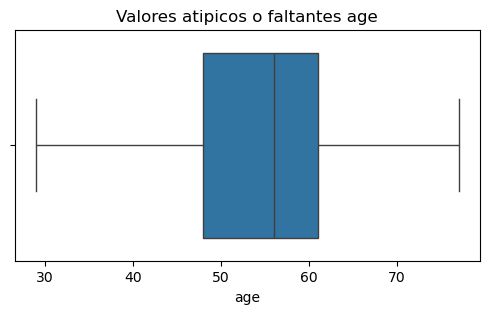

In [26]:
#Trabajamos con MiData para procesar e limpiar los datos
plt.figure(figsize=(6,3))
sns.boxplot(x=MiData['age'])
plt.title('Valores atipicos o faltantes age')

Text(0.5, 1.0, 'Valores atipicos o faltantes sex')

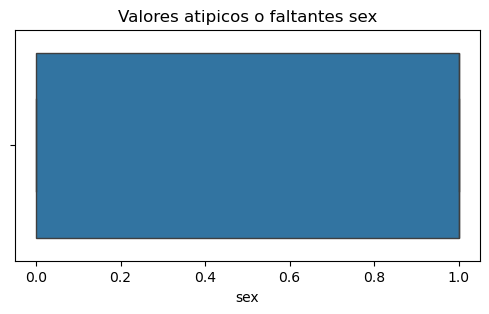

In [28]:
#Quitamos los valores atipicos y el promedio de edad de situa en los aprox 57 años
plt.figure(figsize=(6,3))
sns.boxplot(x=MiData['sex'])
plt.title('Valores atipicos o faltantes sex')

Text(0.5, 1.0, 'Valores atipicos o faltantes cp')

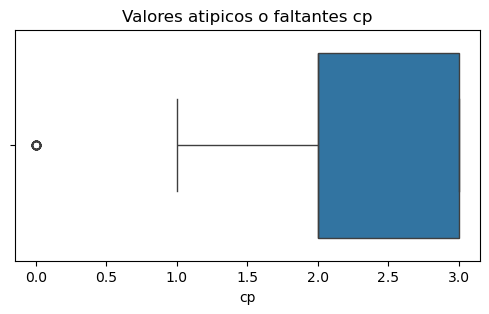

In [30]:
#Dejamos valores de 0 y 1 lo que indica que no hay valores atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=MiData['cp'])
plt.title('Valores atipicos o faltantes cp')

Text(0.5, 1.0, 'Valores atipicos o faltantes trestbps')

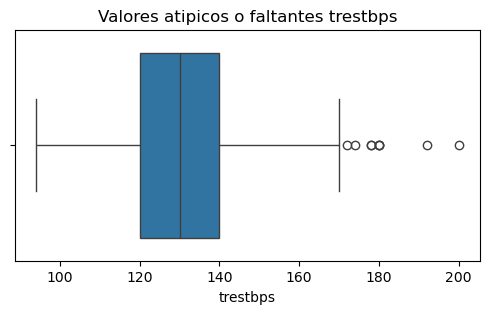

In [34]:
#Quitamos los valores atipicos ya que los datos se situan entre 0 y 3
plt.figure(figsize=(6,3))
sns.boxplot(x=MiData['trestbps'])
plt.title('Valores atipicos o faltantes trestbps')

Text(0.5, 1.0, 'Valores atipicos o faltantes restecg')

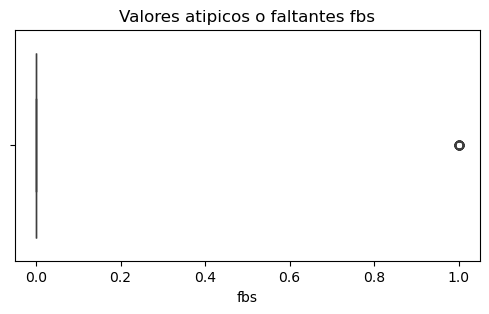

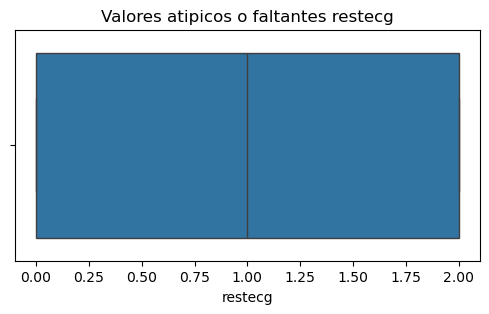

In [38]:
#Contamos el colesterol en la sangre con atipicos de entre 400 y +500 
plt.figure(figsize=(6,3))
sns.boxplot(x=MiData['fbs'])
plt.title('Valores atipicos o faltantes fbs')
#Quitamos valores atípicos.
plt.figure(figsize=(6,3))
sns.boxplot(x=MiData['restecg'])
plt.title('Valores atipicos o faltantes restecg')

Text(0.5, 1.0, 'Valores atipicos o faltantes exang')

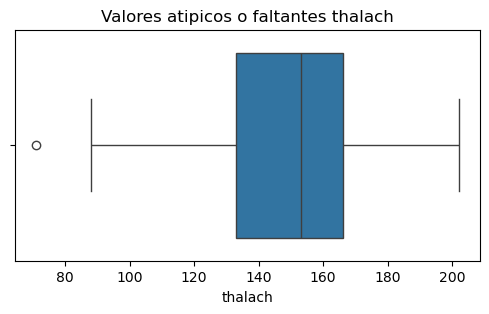

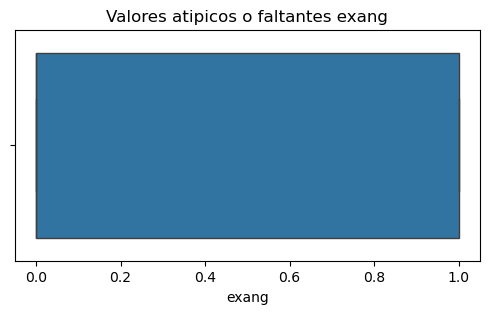

In [42]:
#Quitamos los valores de atipicospara restecg y thalach ya que se encuentran en parametros
plt.figure(figsize=(6,3))
sns.boxplot(x=MiData['thalach'])
plt.title('Valores atipicos o faltantes thalach')
plt.figure(figsize=(6,3))
sns.boxplot(x=MiData['exang'])
plt.title('Valores atipicos o faltantes exang')

In [48]:
#Miramos y corregimos valores falantes
print("Cantidad de registros en cero trestbps: ", MiData['trestbps'])
print("Cantidad de registros en cero thalach: ", MiData['thalach'])
print("Cantidad de registros en cero old peak: ", MiData['oldpeak'])
realData['trestbps']=realData['trestbps'].replace(0,realData['trestbps'].isin([0]).mean())
realData['thalach']=realData['thalach'].replace(0,realData['trestbps'].isin([0]).mean())
realData['oldpeak']=realData['oldpeak'].replace(0,realData['oldpeak'].isin([0]).mean())

Cantidad de registros en cero trestbps:  0      160
1      140
2      150
3      138
4      110
      ... 
292    152
293    118
294    120
295    138
296    126
Name: trestbps, Length: 297, dtype: int64
Cantidad de registros en cero thalach:  0      131
1      151
2      114
3      174
4      144
      ... 
292    181
293    140
294    130
295    182
296    156
Name: thalach, Length: 297, dtype: int64
Cantidad de registros en cero old peak:  0      0.1
1      1.8
2      2.6
3      1.4
4      1.8
      ... 
292    0.0
293    1.2
294    1.6
295    1.4
296    0.0
Name: oldpeak, Length: 297, dtype: float64


Text(0.5, 1.0, 'Valores atipicos o faltantes chol')

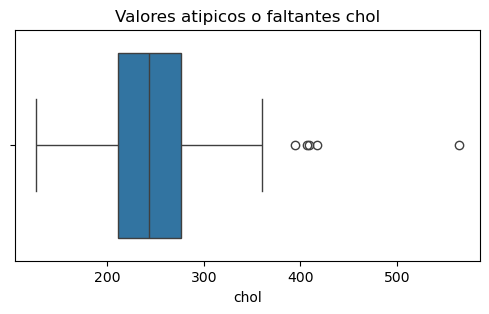

In [50]:

#Identificamos valores atipicos del chol
plt.figure(figsize=(6,3))
sns.boxplot(x=realData['chol'])
plt.title('Valores atipicos o faltantes chol')

In [58]:
#Miramos cantidad de datos atipicos
nivel_minimo=200
nivel_maximo=300
totalAtipicos=((MiData['chol']<nivel_minimo)|(MiData['chol']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(totalAtipicos))
#Filtramos datos
MiData=MiData[(MiData['chol']<nivel_maximo)&(MiData['chol']>nivel_minimo)]
#Validamos
totalAtipicos=((MiData['chol']<nivel_minimo)|(MiData['chol']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(totalAtipicos))

El total de datos atipicos es 92
El total de datos atipicos es 0


In [60]:
MiData['condition'].value_counts()

condition
0    109
1     94
Name: count, dtype: int64

In [62]:
#Divido el dataset en train y test (75-25)

X = MiData.drop('condition',axis=1)
Y = MiData['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25, stratify=Y, random_state=0)

In [64]:
#Importamos librerias 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
#Entrenamos el modelo configurando hiperarametros
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train , Y_train)
#Creamos modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [66]:
X_test.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
275,45,1,3,104,208,0,2,148,1,3.0,1,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
215,58,0,3,100,248,0,2,122,0,1.0,1,0,0
170,65,0,3,150,225,0,2,114,0,1.0,1,3,2
220,58,1,3,150,270,0,2,111,1,0.8,0,0,2
130,48,0,2,130,275,0,0,139,0,0.2,0,0,0
154,37,0,2,120,215,0,0,170,0,0.0,0,0,0
115,53,1,2,130,246,1,2,173,0,0.0,0,3,0
23,74,0,1,120,269,0,2,121,1,0.2,0,1,0
276,45,0,3,138,236,0,2,152,1,0.2,1,0,0


In [68]:
#Revisamos el rendimiento del modelo
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.79      0.79      0.79        24

    accuracy                           0.80        51
   macro avg       0.80      0.80      0.80        51
weighted avg       0.80      0.80      0.80        51



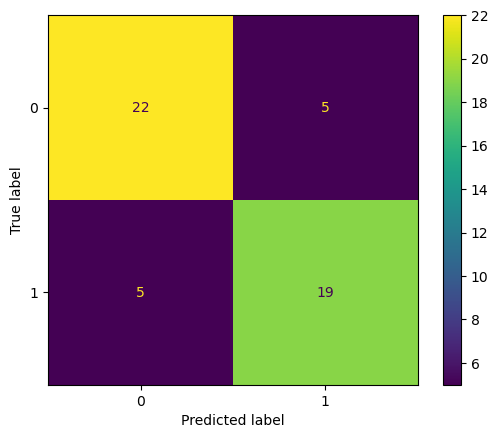

In [70]:
#Creamos la matriz de confusión
cm = confusion_matrix(Y_test,Prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()